# Đồ án cuối kì Lập trình cho khoa học dữ liệu


## Link đến github repo

https://github.com/plphuc/HCMUS_P4DS_FinalProject.git

## Thành viên nhóm


| |Họ và tên|MSSV|Github account|
|:--:|:--|:--:|:--|
|1|Võ Thành Nam|19120301|[thanhnam001](https://github.com/thanhnam001)|
|2|Phạm Lưu Mỹ Phúc|19120331|[plphuc](https://github.com/plphuc)|

## Môi trường code

In [1]:
import sys
sys.executable

'C:\\Users\\Nam\\anaconda3\\envs\\min_ds-env\\python.exe'

## Tổng quan về dữ liệu sẽ được dùng để phân tích

Bộ dữ liệu được sử dụng là file `DataScientist.csv`. Đây là dữ liệu nằm trong một bộ dữ liệu gồm nhiều file khác về thông tin tuyển dụng của những ngành nghề liên quan đến Data. 
- Bộ dữ liệu được tác giả *picklesueat* lấy từ trang web https://www.glassdoor.com/ (một trang web tìm kiếm việc làm), sử dụng công cụ `selenium`. 
- Bộ dữ liệu đã được tác giả public tại [Github](https://github.com/picklesueat/data_jobs_data) và được reup tại [Kaggle](https://www.kaggle.com/andrewmvd/data-scientist-jobs).
- Về license của dữ liệu, chỉ có [MIT License](https://github.com/harshibar/5-python-projects/blob/master/LICENSE), tác giả cho phép mọi người có thể tải xuống tùy ý.
- File dữ liệu `DataScientist.csv` là file dữ liệu về thông tin tuyển dụng của nghề Data Scientist bao gồm tên vị trí tuyển dụng, mức lương, tên công ty,...

## Import các thư viện cần thiết

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import math 
import seaborn as sns

## Khám phá dữ liệu (phần 1)

### Đọc dữ liệu vào từ file csv vào dataframe

In [3]:
ds_df = pd.read_csv('DataScientist.csv')
ds_df

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3905,3905,4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3906,3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3907,3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


Đầu tiên, ta thấy dữ liệu có đến 2 cột index, ta sẽ không sử dụng 2 cột này, do đó sẽ loại bỏ 2 cột này đi.

In [4]:
ds_df.drop(columns = ['Unnamed: 0','index'],inplace = True)

### Số lượng dòng và cột của dữ liệu

In [5]:
n_rows, n_cols = ds_df.shape
print(f'Number of rows: {n_rows}')
print(f'Number of columns: {n_cols}')

Number of rows: 3909
Number of columns: 15


### Xét xem các dữ liệu có trùng nhau hay không

In [6]:
print(f'Number of duplicated rows: {sum(ds_df.duplicated())}')

Number of duplicated rows: 0


### Ý nghĩa của các cột trong dataframe
(Dựa theo mô tả tại trang web [Kaggle](https://www.kaggle.com/andrewmvd/data-scientist-jobs))

- **Job Title:** tên vị trí tuyển dụng.
- **Salary Estimate:** mức lương dự kiến.
- **Job Description:** mô tả công việc.
- **Rating:** điểm đánh giá của công ty.
- **Company Name:** tên công ty.
- **Location:** địa điểm làm việc.
- **Headquarters:** trụ sở chính của công ty.
- **Size:** kích thước công ty (số lượng nhân viên).
- **Founded:** năm thành lập công ty.
- **Type of ownership:** loại hình sở hữu của công ty.
- **Industry:** phân loại công nghiệp của công ty.
- **Sector:** phân loại ngành của công ty.
- **Revenue:** doanh thu của công ty (theo năm).
- **Competitors:** công ty đối thủ.
- **Easy Apply:** công ty có dễ apply hay không.

### Sơ lược về dữ liệu trong các cột

In [7]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          3909 non-null   object 
 1   Salary Estimate    3909 non-null   object 
 2   Job Description    3909 non-null   object 
 3   Rating             3909 non-null   float64
 4   Company Name       3909 non-null   object 
 5   Location           3909 non-null   object 
 6   Headquarters       3909 non-null   object 
 7   Size               3909 non-null   object 
 8   Founded            3909 non-null   int64  
 9   Type of ownership  3909 non-null   object 
 10  Industry           3909 non-null   object 
 11  Sector             3909 non-null   object 
 12  Revenue            3909 non-null   object 
 13  Competitors        3909 non-null   object 
 14  Easy Apply         3909 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 458.2+ KB


### Nhận xét chung

- Mỗi dòng dữ liệu là một thể hiện về các thông tin tuyển dụng của các công ty và không có dòng nào có dấu hiệu bất thường.
- Như ta có thể thấy, dữ liệu không có bất kì dòng nào thiếu hay trùng lắp. Tuy nhiên, khi quan sát bảng dữ liệu ở phía trên, dễ nhận ra tác giả đã thay thế các dữ liệu (có thể là bị thiếu) bằng giá trị `-1`.
- Những cột đáng lẽ cần phải ở kiểu dữ liệu là số như `Salary Estimate`, `Size` thì lại có kiểu dữ liệu là object, ta cần phải xử lí những cột này.
- Cột `Company Name` có vẻ bị lỗi khi thu thập dữ liệu (tên công ty gắn liền với rating).
- Cột `Easy Apply` chỉ nên có giá trị `True` hoặc `False`.
- ...

Ta không quan sát được toàn bộ dữ liệu, do đó ta sẽ phân tích và tiền xử lí cho từng cột trong phần tiền xử lí dữ liệu.

## Tiền xử lí dữ liệu

### Các giá trị của cột Job Title liệu đã đúng hay chưa?

Trước tiên, ta quan sát 20 giá trị xuất hiện nhiều nhất và ít nhất.

In [8]:
job_title_first_20 = ds_df['Job Title'].value_counts()[:20].reset_index()
job_title_last_20 = ds_df['Job Title'].value_counts()[-20:].reset_index()
pd.concat([job_title_first_20,job_title_last_20],axis=1).rename(columns = {'Job Title':'count','index':'Job Title'})

,Job Title,count,Job Title,count
0,Data Scientist,274,"R&D Scientist, Cellular Manufacturing",1
1,Data Engineer,260,"Field Medical Scientist, LHN/GBM/Breast",1
2,Data Analyst,246,Principal Data Scientist / Sr. Principal Data ...,1
3,Senior Data Scientist,91,REMOTE Data Analyst,1
4,Senior Data Analyst,47,"Research Scientist, Vector Engineering",1
5,Machine Learning Engineer,47,BIG DATA ENGINEER,1
6,Big Data Engineer,41,Senior Data Engineer (ASE5) Asset and Liabilit...,1
7,Business Intelligence Analyst,39,Lead Data Scientist/ Statistician,1
8,Senior Data Engineer,37,COMPUTER SCIENTIST- ENGINEER - RESEARCH ENGINE...,1
9,Lead Data Scientist,23,Product Manager - Data Science,1


Có thể thấy, thông tin `Job Title` được miêu tả khá "lộn xộn" có thể là: tuyển nhiều vị trí cùng lúc, ghi tên vị trí cùng thời gian làm việc. Do đó, ta sẽ xử lý để cột chỉ thể hiện một công việc chính (xem việc được nhắc đến đầu tiên là công việc chính). Ngoài ra, có vài vị trí là như nhau nhưng sử dụng thuật ngữ khác nhau (Sr., Senior) ta sẽ xử lý những giá trị này để chúng thể hiện cùng từ ngữ.

In [9]:
ds_df['Job Title'] = ds_df['Job Title'].apply(lambda x:''.join(re.compile("[,\/-]").split(x)[:1]))
ds_df['Job Title'].value_counts()

Data Scientist                                           357
Data Engineer                                            290
Data Analyst                                             278
Senior Data Scientist                                    105
Data Scientist                                            70
                                                        ... 
Internship                                                 1
Associate Scientist In vivo Pharmacology                   1
Manufacturing Science and Technology (MS&T) Scientist      1
SQL Data Engineer                                          1
Graphics (GPU) Performance Modeling Engineer               1
Name: Job Title, Length: 1378, dtype: int64

In [10]:
ds_df['Job Title'] = ds_df['Job Title'].str.replace('Sr.','Senior',regex=False)
ds_df['Job Title'] = ds_df['Job Title'].str.replace('Jr.','Junior',regex=False)

### Tiền xử lý cột Salary Estimate


Cột này bao gồm các giá trị là khoảng ước tính, do đó ta sẽ tách thành 2 cột min và max, sau đó loại bỏ cột ban đầu.

In [11]:
def split_to_minmax(s):
    value_range = [int(d) for d in re.findall(r'\d+',s)]
    return value_range
ds_df[['SalaryMin','SalaryMax']] = pd.DataFrame(ds_df['Salary Estimate'].apply(split_to_minmax).to_list())
ds_df.drop(columns=['Salary Estimate'],inplace = True)

### Tiền xử lý cột Rating

In [12]:
ds_df['Rating'].unique()

array([ 3.5,  4.5, -1. ,  3.4,  2.9,  4.4,  5. ,  4.8,  3.9,  4.3,  3. ,
        3.6,  3.3,  4. ,  4.1,  3.8,  3.7,  4.2,  4.6,  4.7,  3.2,  2.8,
        2.7,  4.9,  2.5,  1. ,  1.9,  3.1,  1.6,  2.6,  2.1,  2.3,  2.4,
        2. ,  2.2,  1.5,  1.7])

Cột `Rating` có khá nhiều giá trị thiếu được đánh dấu bằng giá trị `-1`. Ta sẽ thay thế các giá trị này bằng trung bình của các giá trị còn lại.

In [13]:
# Thay giá trị -1 thành nan
ds_df['Rating'].replace(-1,np.nan,inplace = True)
# Tính mean của các giá trị khác nan
mean = ds_df['Rating'].mean(skipna = True).round(1)
# Thay thế các giá trị nan bằng mean
ds_df['Rating'].replace(np.nan,mean,inplace = True)

### Loại bỏ rating trong Company name

Như đã nói ở phần Khám phá dữ liệu, cột `Company Name` đã bị lỗi khi thu thập dữ liệu (tên công ty gắn liền với rating). Vì đã có cột `Rating` nên ta sẽ thực hiện xóa phần rating bị thừa trong cột này.

In [14]:
ds_df['Company Name'] = ds_df['Company Name'].str.split('\n').str[0]

### Tiền xử lý cột Location và loại bỏ missing value

In [15]:
ds_df['Location'].replace('-1',np.nan,inplace = True)

In [16]:
ds_df['Location'].value_counts()

Austin, TX            345
Chicago, IL           330
San Diego, CA         304
New York, NY          303
Houston, TX           219
                     ... 
Summit, NJ              1
Berwyn, PA              1
Allegheny West, PA      1
West Orange, NJ         1
Cedar Park, TX          1
Name: Location, Length: 191, dtype: int64

Trong cột `Location`, mỗi giá trị bao gồm tên thành phố và tên bang cách nhau bởi dấu `,`. Ta sẽ tách các giá trị này thành 2 cột là `City` và `State`.

In [17]:
ds_df[['City','State']] = ds_df['Location'].str.split(', ',expand=True)
ds_df.drop(columns = ['Location'], inplace = True)

### Tách tên thành phố trong cột Headquarters và xử lý missing value

In [18]:
ds_df['Headquarters'].replace('-1',np.nan,inplace = True)

In [19]:
headquarters_splited = ds_df['Headquarters'].str.split(',',expand=True)
headquarters_splited

,0,1,2
0,Montreal,Canada,None
1,New York,NY,None
2,New York,NY,None
3,Lyndhurst,NJ,None
4,New York,NY,None
...,...,...,...
3904,Irving,TX,None
3905,Woodridge,IL,None
3906,Irving,TX,None
3907,Omaha,NE,None


Một số công ty có định dạng `Headquarters` khác với công ty còn lại, ta sẽ xem xét và giải quyết các giá trị đặc biệt này.

In [20]:
headquarters_splited[~headquarters_splited[2].isnull()]

,0,1,2
142,New York,NY (US),NY
303,New York,NY (US),NY
1686,Philadelphia,PA (US),PA
1751,Philadelphia,PA (US),PA
1816,New York,NY (US),NY
2118,San Marcos,CA (US),CA


Như vậy, các định dạng khác thường là do một số công ty ghi thêm quốc gia, ta sẽ loại bỏ các giá trị này, sau đó loại bỏ cột 2.

In [21]:
headquarters_splited[1] = headquarters_splited[1].str.replace('\(\w*\)','',regex=True)
headquarters_splited[1] = headquarters_splited[1].str.strip()
headquarters_splited.drop(columns=[2],inplace=True)

Sau khi đã phân tách thành 2 cột, ta tạo ra 2 cột mới tương ứng là `Headquarters_City` và `Headquarters_State/Country` trong `ds_df` và loại bỏ đi cột `Headquarters`.

In [22]:
ds_df[['Headquarters_City','Headquarters_State/Country']] = headquarters_splited
ds_df.drop(columns=['Headquarters'],inplace = True)

### Tiền xử lý cột Size

In [23]:
ds_df['Size'].value_counts()

10000+ employees           993
51 to 200 employees        563
1001 to 5000 employees     553
1 to 50 employees          550
201 to 500 employees       418
501 to 1000 employees      307
-1                         229
5001 to 10000 employees    219
Unknown                     77
Name: Size, dtype: int64

Cột `Size` gồm 3 kiểu thể hiện dữ liệu: gồm `-1` cho các giá trị thiếu, `Unknown` là các giá trị mà công ty không cung cấp và còn lại là các khoảng. Ta sẽ tiền xử lí cột này như sau:
* Các giá trị `-1` và `Unknown` sẽ thay thế bằng giá trị `NaN`.
* Các giá trị là các khoảng, ta sẽ chuyển thành giá trị trung bình, riêng khoảng lớn nhất sẽ dùng giá trị phân chia (e.g `10000+ employees` sẽ thay bằng giá trị `10000`).

In [24]:
def convert_to_mean(s):
    if type(s) != str:
        return
    value_range = [int(d) for d in re.findall(r'\d+',s)]
    return math.floor(sum(value_range)/len(value_range))
# Chuyển giá trị -1 và Unknown thành nan
ds_df['Size'].replace('-1',np.nan,inplace = True)
ds_df['Size'].replace('Unknown',np.nan,inplace = True)
# Biến đổi các khoảng thành giá trị trung bình
ds_df['Size']=ds_df['Size'].apply(convert_to_mean)

### Tiền xử lý cột Founded 

In [25]:
ds_df['Founded'].value_counts().sort_index()

-1       977
 1625      2
 1682      1
 1740      9
 1775     13
        ... 
 2016     49
 2017     40
 2018     27
 2019     14
 2020      1
Name: Founded, Length: 173, dtype: int64

Cột `Founded` có khá nhiều giá trị thiếu, tác giả đã đánh dấu bằng giá trị `-1`. Ta không có cách nào để xác định năm thành lập của những công ty này. Do đó, để tiện cho việc tính toán các tác vụ về sau (tính giá trị thiếu,...), ta sẽ chuyển các giá trị `-1` về `NaN`.

In [26]:
ds_df['Founded'].replace(-1,np.nan,inplace = True)
ds_df['Founded'].unique()

array([2007., 2008.,   nan, 2019., 1985., 1993., 2018., 2000., 2014.,
       2011., 1999., 2001., 1998., 2005., 1943., 2012., 1923., 2003.,
       2002., 2015., 2006., 2010., 1853., 1990., 1914., 2013., 2004.,
       1799., 1935., 1995., 1994., 1988., 1917., 1947., 1981., 1940.,
       1841., 2017., 1896., 2009., 1898., 1968., 1862., 1934., 1992.,
       2016., 1984., 1987., 1966., 1976., 1871., 1625., 1997., 1967.,
       1948., 1913., 1989., 1893., 1904., 1911., 1961., 1806., 1969.,
       1945., 1784., 1857., 1971., 1852., 1922., 1851., 1956., 1906.,
       1973., 1960., 1975., 1982., 1996., 1931., 1986., 1902., 1909.,
       1880., 1946., 1970., 1979., 1977., 1965., 1954., 1850., 1980.,
       1919., 1983., 1888., 1978., 1872., 1831., 1936., 1939., 1937.,
       1928., 1991., 1929., 1944., 1901., 1974., 1925., 1817., 1963.,
       1894., 1890., 1882., 1892., 1908., 1926., 1883., 1845., 1849.,
       1918., 1900., 1889., 1837., 1930., 1877., 1910., 1962., 1955.,
       1897., 1949.,

Quan sát cột `Founded` các giá trị còn lại đều đã chính xác. Kiểu dữ liệu `int64` đã phù hợp với ý nghĩa của cột là năm thành lập công ty.

### Tiền xử lý cột Industry 

In [27]:
ds_df['Industry'].value_counts()

-1                                  546
IT Services                         472
Staffing & Outsourcing              313
Biotech & Pharmaceuticals           293
Computer Hardware & Software        264
                                   ... 
Sporting Goods Stores                 1
Health Fundraising Organizations      1
Shipping                              1
Self-Storage Services                 1
Truck Rental & Leasing                1
Name: Industry, Length: 96, dtype: int64

Tương tự cột `Founded`, cột `Industry` cũng có các giá trị thiếu được đánh dấu bằng giá trị `-1`. Ta sẽ chuyển giá trị này thành `NaN`.

In [28]:
ds_df['Industry'].replace('-1',np.nan,inplace = True)

### Tiền xử lý cột Revenue 

In [29]:
ds_df["Revenue"].value_counts()

Unknown / Non-Applicable            1163
$10+ billion (USD)                   599
$100 to $500 million (USD)           338
-1                                   229
$50 to $100 million (USD)            214
$2 to $5 billion (USD)               211
$10 to $25 million (USD)             191
$1 to $2 billion (USD)               180
$1 to $5 million (USD)               170
$25 to $50 million (USD)             143
$5 to $10 billion (USD)              133
Less than $1 million (USD)           124
$500 million to $1 billion (USD)     114
$5 to $10 million (USD)              100
Name: Revenue, dtype: int64

Như có thể quan sát, cột này có 3 kiểu thể hiện dữ liệu: giá trị thiếu đánh dấu bằng `-1`, giá trị `Unknown / Non-Applicable` và giá trị có định dạng là một khoảng ước lượng. Ta sẽ tiền xử lí cột này như sau:
* Các dòng có giá trị `-1` hoặc `Unknown / Non-Applicable` sẽ chuyển thành dạng `NaN`.
* Các dòng có giá trị là môt khoảng ước lượng sẽ chuyển thành giá trị trung bình của khoảng. Với 2 khoảng đầu cuối, ta sẽ mặc định thành giá trị phân chia của khoảng đó. Ngoài ra, các giá trị billion cũng sẽ được đổi thành million.

In [30]:
def convert_to_num(s):
    if type(s) != str:
        return
    if re.compile(r'\$\d+\+ billion').match(s):
        value_range = [int(d) for d in re.findall(r'\d+',s)]
        return sum(value_range)/len(value_range)*1000
    elif re.compile(r'\$\d+ to \$\d+ billion').match(s):
        value_range = [int(d) for d in re.findall(r'\d+',s)]
        return sum(value_range)/len(value_range)*1000
    elif re.compile(r'\$\d+ million to \$\d+ billion').match(s):
        match = re.compile(r'\$(\d+) million to \$(\d+) billion').match(s)
        return (int(match.group(1))+int(match.group(2))*1000)/2
    else:
        value_range = [int(d) for d in re.findall(r'\d+',s)]
        return sum(value_range)/len(value_range)
# Chuyển giá trị -1 và Unknown/Non-Applicable thành nan
ds_df['Revenue'].replace('-1',np.nan,inplace = True)
ds_df['Revenue'].replace('Unknown / Non-Applicable',np.nan,inplace = True)
# Chuyển các khoảng ước lượng thành giá trị số
ds_df['Revenue'] = ds_df['Revenue'].apply(convert_to_num)

### Tiền xử lý cột Easy Apply

In [31]:
print(ds_df['Easy Apply'].dtype)
ds_df["Easy Apply"].value_counts()

object


-1      3745
True     164
Name: Easy Apply, dtype: int64

Cột `Easy Apply` hiện tại gồm 2 giá trị `-1` và `True`. Vì cung cấp thông tin công ty có dễ apply hay không, cột nên mang giá trị `True` hoặc `False`. Do đó, ta thực hiện replace `-1` bằng `False` và chuyển dtype của cột về đúng dạng `bool`.

In [32]:
ds_df["Easy Apply"] = ds_df["Easy Apply"].replace('-1', False).astype(bool)

### Tiền xử lý các cột Type of ownership, Sector, Competitors

In [33]:
ds_df['Type of ownership'].unique()

array(['Company - Private', 'Unknown', 'Company - Public',
       'Nonprofit Organization', '-1', 'Government', 'Hospital',
       'Self-employed', 'Subsidiary or Business Segment', 'Contract',
       'School / School District', 'Private Practice / Firm',
       'College / University', 'Franchise', 'Other Organization'],
      dtype=object)

In [34]:
ds_df['Sector'].unique()

array(['Travel & Tourism', 'Consumer Services', '-1',
       'Information Technology', 'Business Services', 'Insurance',
       'Finance', 'Retail', 'Media', 'Restaurants, Bars & Food Services',
       'Agriculture & Forestry', 'Non-Profit', 'Education', 'Government',
       'Health Care', 'Oil, Gas, Energy & Utilities',
       'Accounting & Legal', 'Manufacturing', 'Real Estate',
       'Biotech & Pharmaceuticals', 'Arts, Entertainment & Recreation',
       'Aerospace & Defense', 'Construction, Repair & Maintenance',
       'Transportation & Logistics', 'Telecommunications',
       'Mining & Metals'], dtype=object)

In [35]:
ds_df['Competitors'].value_counts()

-1                                        2760
Amazon, Accenture, Microsoft                61
Google, Microsoft, Samsung Electronics      60
Google, Microsoft, Walmart                  47
Google, Microsoft, Apple                    25
                                          ... 
SpotX, FreeWheel, TubeMogul                  1
Accenture, West Monroe, Slalom               1
Agilent Technologies                         1
TEKsystems, CGI, SDLC Partners               1
IBM, Apple, HP Inc.                          1
Name: Competitors, Length: 422, dtype: int64

Quan sát 3 cột này thì có vẻ ở bước tiền xử lý này ta chỉ cần thay thế giá trị `-1` thành giá trị `NaN`

In [36]:
ds_df[['Type of ownership','Sector','Competitors']] = ds_df[['Type of ownership','Sector','Competitors']].replace('-1',np.nan)

## Khám phá dữ liệu (phần 2)

### Tiếp theo ta kiểm tra xem `dtype` của các cột đã đúng chưa

In [37]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Job Title                   3909 non-null   object 
 1   Job Description             3909 non-null   object 
 2   Rating                      3909 non-null   float64
 3   Company Name                3909 non-null   object 
 4   Size                        3603 non-null   float64
 5   Founded                     2932 non-null   float64
 6   Type of ownership           3680 non-null   object 
 7   Industry                    3363 non-null   object 
 8   Sector                      3363 non-null   object 
 9   Revenue                     2517 non-null   float64
 10  Competitors                 1149 non-null   object 
 11  Easy Apply                  3909 non-null   bool   
 12  SalaryMin                   3909 non-null   int64  
 13  SalaryMax                   3909 

Nhìn chung thì các cột dữ liệu đã ở đúng định dạng cần thiết.

### Ta kiểm tra với các dữ liệu dạng numeric, giá trị của chúng phân bố như thế nào?

In [38]:
numeric_cols = ds_df.describe().columns.to_list()
missing_ratio = ds_df[numeric_cols].agg([lambda x:x.isnull().mean()*100])
numeric_cols_profiles = pd.concat([ds_df.describe(),missing_ratio])
numeric_cols_profiles.rename(index={'<lambda>':'missing_ratio'},inplace=True)
numeric_cols_profiles.round(3)

,Rating,Size,Founded,Revenue,SalaryMin,SalaryMax
count,3909.000,3603.000,2932.000,2517.000,3909.000,3909.000
mean,3.786,3800.215,1972.371,3261.438,81.910,133.825
std,0.582,4241.318,52.720,4167.296,34.311,45.011
min,1.000,25.000,1625.000,1.000,10.000,26.000
25%,3.500,125.000,1961.000,37.500,52.000,97.000
50%,3.800,750.000,1995.000,300.000,76.000,129.000
75%,4.100,10000.000,2006.000,7500.000,110.000,165.000
max,5.000,10000.000,2020.000,10000.000,200.000,254.000
missing_ratio,0.000,7.828,24.994,35.610,0.000,0.000


Quan sát các cột dữ liệu dạng số thì không có gì bất thường xuất hiện.

### Ta kiểm tra với các dữ liệu dạng categorical, giá trị của chúng phân bố như thế nào?

In [39]:
categorical_cols = ['Job Title', 'Job Description', 'Company Name', 'Type of ownership', 'Industry', 'Sector',\
                 'Competitors', 'Easy Apply', 'City', 'State', 'Headquarters_City', 'Headquarters_State/Country']
def number_of_unique_vals(s):
    return s.dropna().nunique()
def unique_vals(s):
    return s.dropna().unique()
def missing_ratio(s):
    return (s.isnull().mean()*100).round(3)
cate_cols_profiles = ds_df[categorical_cols].agg([missing_ratio,number_of_unique_vals,unique_vals])
cate_cols_profiles

,Job Title,Job Description,Company Name,Type of ownership,Industry,Sector,Competitors,Easy Apply,City,State,Headquarters_City,Headquarters_State/Country
missing_ratio,0.0,0.0,0.0,5.858,13.968,13.968,70.606,0.0,0.0,0.0,6.14,6.14
number_of_unique_vals,1361,3685,2063,14,95,25,421,2,185,11,523,77
unique_vals,"[Senior Data Scientist, Data Scientist, Data S...","[ABOUT HOPPER\n\nAt Hopper, we’re on a mission...","[Hopper, Noom US, Decode_M, Sapphire Digital, ...","[Company - Private, Unknown, Company - Public,...","[Travel Agencies, Health, Beauty, & Fitness, I...","[Travel & Tourism, Consumer Services, Informat...","[Zocdoc, Healthgrades, BBDO, Grey Group, Droga...","[False, True]","[New York, Lyndhurst, Brooklyn, Jersey City, C...","[NY, NJ, CA, IL, TX, AZ, DE, PA, United Kingdo...","[Montreal, New York, Lyndhurst, Hartford, Stam...","[Canada, NY, NJ, CT, United Kingdom, CA, IL, F..."


Cột `Competitors` có tỉ lệ thiếu rất lớn, tuy nhiên ta chưa chắc chắn lí do để loại bỏ cột này nên sẽ giữ nguyên. Các cột Categorical còn lại không có gì bất thường.

## Nhìn lại toàn bộ dữ liệu trước khi đặt câu hỏi

In [40]:
ds_df = ds_df[['Job Title', 'Job Description', 'Rating', 'Company Name', 'Size', 'SalaryMin', 'SalaryMax',
               'City', 'State', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
               'Headquarters_City', 'Headquarters_State/Country','Competitors', 'Easy Apply']]
ds_df.head()

,Job Title,Job Description,Rating,Company Name,Size,SalaryMin,SalaryMax,City,State,Founded,Type of ownership,Industry,Sector,Revenue,Headquarters_City,Headquarters_State/Country,Competitors,Easy Apply
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,750.0,111,181,New York,NY,2007.0,Company - Private,Travel Agencies,Travel & Tourism,NaN,Montreal,Canada,NaN,False
1,Data Scientist,"At Noom, we use scientifically proven methods ...",4.5,Noom US,3000.0,111,181,New York,NY,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,NaN,New York,NY,NaN,False
2,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,3.8,Decode_M,25.0,111,181,New York,NY,NaN,Unknown,NaN,NaN,NaN,New York,NY,NaN,True
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,350.0,111,181,Lyndhurst,NJ,2019.0,Company - Private,Internet,Information Technology,NaN,Lyndhurst,NJ,"Zocdoc, Healthgrades",False
4,Director,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,125.0,111,181,New York,NY,2007.0,Company - Private,Advertising & Marketing,Business Services,NaN,New York,NY,"BBDO, Grey Group, Droga5",False


## Đưa ra các câu hỏi cần trả lời

(Chi tiết về mục đích, lợi ích, ... các câu hỏi sẽ được đề cập cụ thể ở mỗi câu)

- **Câu hỏi 1:** Liệu điểm Rating có liên hệ với sự đãi ngộ về mức lương của một công ty hay không?

- **Câu hỏi 2:** Những công cụ/ngôn ngữ nào thường được các nhà tuyển dụng yêu cầu trong thông báo tuyển dụng?

- **Câu hỏi 3:** Phân bố các Sector theo State như thế nào?

- **Câu hỏi 4:** Vị trí Data Science mà các lĩnh vực mạnh có nhu cầu tuyển dụng cao? 

- **Câu hỏi 5:** Mức lương có liên quan tới size của công ty không?

### Câu hỏi 1: Liệu điểm Rating có liên hệ với sự đãi ngộ về mức lương của một công ty hay không?

Lương thưởng luôn là vấn đề ưu tiên hàng đầu của mọi người khi tìm kiếm việc làm, còn rating phản ánh chất lượng của một công ty nào đó bởi những người đã hoặc đang làm việc tại đó. Việc xem xét Rating và mức lương sẽ giúp có được cái nhìn về khía cạnh lương thưởng của các công ty trên thị trường tuyển dụng. (Những công ty có điểm Rating thấp có mức lương như thế nào, có chênh lệch nhiều so với những công ty được đánh giá cao hơn hay không? Những công ty được đánh giá cao thì mức lương đi kèm của họ có thực sự cao hơn không và cao hơn như thế nào?,...)

Đầu tiên, ta thấy điểm `Rating` thường là các số thập phân với min là 1 và max là 5, do đó ta sẽ thực hiện đánh giá bằng 2 bước:
- **Bước 1:** Gom các `Rating` thành 5 nhóm `(0,1], (1,2], (2,3], (3,4], (4,5]`, sau đó tính số lượng, giá trị min, max, median và mean của các cột `SalaryMin`, `SalaryMax`.
- **Bước 2:** Vẽ biểu đồ cột về tương quan giữa mức lương trung bình (của cột `SalaryMin` và `SalaryMax`) và điểm được đánh giá. Vẽ biểu đồ tròn để thấy được tỉ lệ điểm đánh giá giữa các nhóm.

**Bước 1:** Gom nhóm và tính các giá trị thống kê.

In [41]:
rs_df = ds_df[['Rating','SalaryMin','SalaryMax']].groupby(pd.cut(ds_df.Rating,[0,1,2,3,4,5]))\
                .agg(['count','min','max','mean','median']).round(2).reset_index()
rs_df

Rating                              SalaryMin                         \
          count  min  max  mean median     count min  max   mean median   
0  (0, 1]    10  1.0  1.0  1.00    1.0        10  12  156  87.30     90   
1  (1, 2]    18  1.5  2.0  1.74    1.6        18  45  138  78.67     74   
2  (2, 3]   317  2.1  3.0  2.74    2.8       317  12  156  77.28     74   
3  (3, 4]  2455  3.1  4.0  3.65    3.7      2455  12  200  80.26     75   
4  (4, 5]  1109  4.1  5.0  4.45    4.4      1109  10  200  86.90     84   

  SalaryMax                          
      count min  max    mean median  
0        10  56  254  138.40  120.0  
1        18  78  217  127.94  105.5  
2       317  27  254  126.31  123.0  
3      2455  27  254  132.02  125.0  
4      1109  26  254  140.02  143.0

**Bước 2:** Vẽ biểu đồ để thể hiện các mối liên hệ. Ở bước 1, ta thấy các giá trị mean và median (`SalaryMin,SalaryMax`) khá gần nhau nên ta sẽ dùng giá trị mean để vẽ biểu đồ.

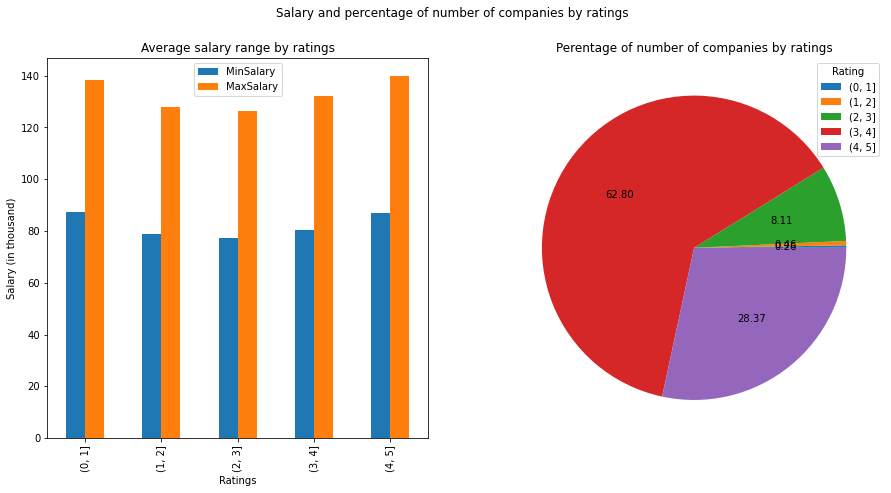

In [42]:
fig, axs = plt.subplots(1, 2)
# Vẽ biểu đồ cột
labels = ['(0, 1]','(1, 2]','(2, 3]','(3, 4]','(4, 5]']
salary_df = pd.DataFrame()
salary_df['MinSalary'] = rs_df['SalaryMin']['mean']
salary_df['MaxSalary'] = rs_df['SalaryMax']['mean']
salary_df.index = labels
salary_df.plot(ax = axs[0], kind = 'bar', figsize=(15, 7))
axs[0].set_title('Average salary range by ratings')
axs[0].set_xlabel('Ratings')
axs[0].set_ylabel('Salary (in thousand)')
# Vẽ biểu đồ tròn
rating_df = rs_df['Rating']['count']
rating_df.plot(ax = axs[1], kind = 'pie', autopct = '%.2f', figsize = (15, 7),labels = None)
axs[1].set_title('Perentage of number of companies by ratings')
axs[1].set_ylabel('')
plt.legend(title = 'Rating',labels = labels)

fig.suptitle('Salary and percentage of number of companies by ratings')
plt.show()

Như vậy, sau khi vẽ biểu đồ xong, ta có những đánh giá sau:
- Phần lớn các công ty có điểm `Rating` nằm ở mức từ 3 đến 4 điểm, chiếm 62.8%. Tiếp theo là các công ty có điểm `Rating` từ 4 đến 5, chiếm 28.37%. Các công ty có điểm nằm ở các nhóm thấp hơn (dưới 3 điểm) chỉ chiếm tỉ lệ rất nhỏ, chưa tới 10%.
- Những công ty có mức `Rating` cao hơn (trong nhóm từ 2 điểm trở lên) thường có mức đãi ngộ cao hơn về lương (cả mức thấp nhất lẫn mức cao nhất). Những công ty có điểm `Rating` thấp không có nghĩa là mức lương sẽ thấp. Tuy nhiên, chúng ta cũng nên lưu ý rằng lượng công ty có điểm `Rating` thấp chỉ chiếm 1 phần rất nhỏ, gần như không đáng kể so với phần còn lại.
- Mức chênh lệch giữa các cột `SalaryMax` với nhau và các cột `SalaryMin` với nhau là có và khá đáng kể (VD: ở cột SalaryMax thì mức chênh lệch giữa nhóm `(3,4]` và nhóm `(4,5]` là ~8000USD/year).

Ta kết luận được rằng, với các công ty trong tập dữ liệu đang xét, mức lương và `Rating` có mối liên hệ với nhau. Những công ty có điểm `Rating` càng cao thì mức lương sẽ càng cao.

### Câu hỏi 2: Những công cụ/ngôn ngữ lập trình nào thường xuyên được các công ty yêu cầu trong thông báo tuyển dụng?

Trong các thông tin tuyển dụng, phần yêu cầu về chuyên môn luôn là phần quan trọng, vì nó sẽ cho các ứng viên biết họ cần phải có những kĩ năng gì, trình độ nào để có thể ứng tuyển vào vị trí mà công ty đang tuyển dụng. Một trong số những yêu cầu quan trọng đối với các ngành nghề liên quan tới Data là việc sử dụng thành thạo các ngôn ngữ lập trình, các công cụ xử lí, các framework, library liên quan tới Data. Do đó, việc trả lời câu hỏi trên sẽ giúp chúng ta biết được các nhà tuyển dụng thường cần ở các ứng viên những gì, để chúng ta có thể chuẩn bị tốt nhất về mặt chuyên môn khi ứng tuyển.

Tham khảo một số công cụ/ngôn ngữ phổ biến: [Link 1](https://medium.com/javarevisited/best-11-data-science-programming-languages-in-2020-122a7ea2bb63), [Link 2](https://www.analyticsinsight.net/10-best-data-science-programming-languages-for-data-aspirants-in-2021/)

Để trả lời câu hỏi trên, ta sẽ thực hiện 2 bước:
- **Bước 1:** Tính tỉ lệ mà các công cụ/ngôn ngữ được yêu cầu trên toàn bộ tập dữ liệu bằng cách tính số lần xuất hiện của công cụ/ngôn ngữ đó trong cột `Job Description` chia cho tổng số dòng. Trong danh sách này sẽ bao gồm một số ngôn ngữ/công cụ phổ biến: `python, SQL, power BI, excel, tableau, hadoop, scala, pandas, matplotlib, matlab, julia, java`. (vì hạn chế về các thao tác xử lí nên những ngôn ngữ như R, SAS,... sẽ không được đề cập ở đây)
- **Bước 2:** Vẽ biểu đồ bar chart để thể hiện các tỉ lệ.

**Bước 1:** Tính tỉ lệ về yêu cầu của các công cụ/ngôn ngữ.

In [43]:
def split_require(s):
    s = s.lower()
    options = ['python', 'sql', 'power bi', 'excel', 'tableau', 'hadoop', 'scala', 'pandas',\
               'matplotlib', 'matlab','julia', 'java']
    checks = [1 if o in s else 0 for o in options]
    return dict(zip(options,checks))
# Tính các loại ngôn ngữ được yêu cầu, lưu vào DataFrame với mỗi giá trị là 1 dict.{language1:1,language2:0,...} với giá trị 1
# là ngôn ngữ đó được yêu cầu và 0 là ngược lại
language_require_df = pd.DataFrame()
language_require_df['options'] = ds_df['Job Description'].apply(split_require)
# Tách các giá trị trong cột thành DataFrame
language_require_df = pd.DataFrame(language_require_df['options'].values.tolist(), index = language_require_df.index)
# Tính tỉ lệ được yêu cầu của mỗi loại ngôn ngữ và sort giảm dần
language_require_ratio = (language_require_df.mean()*100).sort_values(ascending = False)

**Bước 2:** Vẽ biểu đồ tỉ lệ.

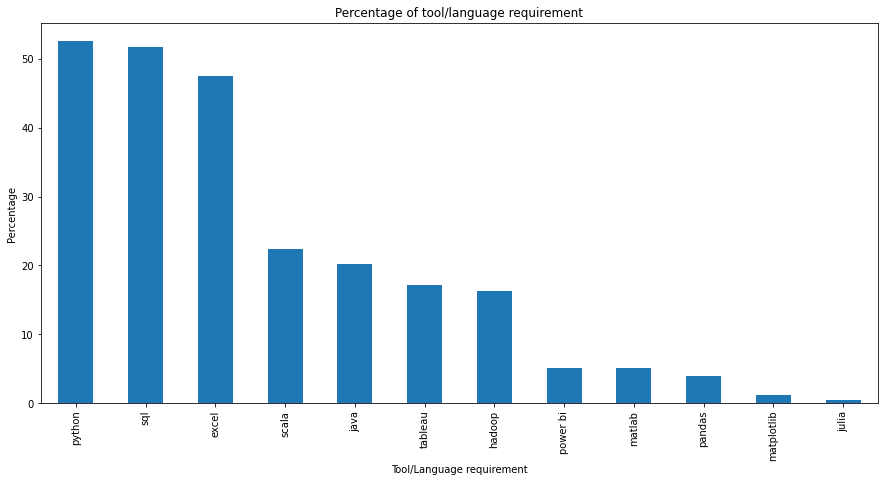

In [44]:
language_require_ratio.plot.bar(figsize=(15, 7))
plt.xlabel('Tool/Language requirement')
plt.ylabel('Percentage')
plt.title('Percentage of tool/language requirement')
plt.show();

Như vậy ta có nhận xét:
- Trong các ngôn ngữ được xét, Python và SQL là 2 ngôn ngữ được các nhà tuyển dụng chú trọng nhất, chiếm hơn 50% các yêu cầu tuyển dụng. Tiếp theo đó là Excel với gần 50%.
- Các ngôn ngữ/công cụ tiếp theo là Scala, Java, Tableau, Hadoop chiếm khoảng từ 15-30%.
- Các ngôn ngữ/công cụ còn lại chiếm tỉ lệ khá thấp, dưới 10%. Tuy nhiên trong phần trên có pandas và matplotlib chỉ là 2 thư viện của python. Do đó, có thể nhà tuyển dụng không ghi cụ thể mà chỉ đề cập vào python nói chung.

Từ dữ liệu đã phân tích, ta có thể trả lời được câu hỏi: nhóm các ngôn ngữ thường được nhà tuyển dụng yêu cầu nhiều nhất là Python, SQL, Excel. Chúng ta nên tập trung học những ngôn ngữ này để có nhiều cơ hội ứng tuyển vào các ngành nghề liên quan tới Data Science. Ngoài ra, những ngôn ngữ như Scala, Java, Tableau, Hadoop cũng rất đáng để đầu tư thời gian.

### Câu hỏi 3: Phân bố các Sector theo State như thế nào?

Các công ty thường sẽ chọn những nơi đặt trụ sở mà có thể giúp họ có thể thu hút được nhiều nhân sự giỏi cũng như thuận tiện cho việc phát triển của cả công ty. Và cũng tùy ngành/lĩnh vực hoặc khả năng phát triển mà các công ty có thể tập trung ở một nơi (e.g Silicon Valley là nơi tập trung rất nhiều các công ty về công nghệ tại Mỹ). Đối với những nhà khoa học dữ liệu nói riêng và những người làm việc liên quan tới dữ liệu nói riêng, ngoài việc có kiến thức chuyên môn về dữ liệu, những kiến thức và kinh nghiệm ở các ngành khác (e.g Finance, Business Services, Biotech,...) sẽ giúp họ có lợi thế hơn khi ứng tuyển và có thể phát huy tốt nhất khả năng khi được nhận công việc đó. Vì vậy, việc biết được sự phân bố các **Sector** theo **State** sẽ giúp chúng ta biết được ở những khu vực nào thì có nhu cầu tuyển dụng cao, và công ty đang tuyển dụng đó thuộc vào ngành nào.

Xem lại các giá trị trong cột `State`.

In [45]:
ds_df['State'].unique()

array(['NY', 'NJ', 'CA', 'IL', 'TX', 'AZ', 'DE', 'PA', 'United Kingdom',
       'FL', 'OH'], dtype=object)

#### Tiền xử lí dữ liệu

Ở phần trên ta đã biết được rằng cột `Sector` bị thiếu giá trị còn cột `State` thì không. Tên của các `State` cũng nằm ở dạng viết tắt, ta sẽ viết lại dưới dạng tên đầy đủ. Trường hợp ngoại lệ trong cột `State` là `United Kingdom`, giá trị này sẽ được giữ nguyên. Ta sẽ tiền xử lí theo các bước:
- Lấy ra 2 cột dữ liệu và đưa vào DataFrame `ss_df`.
- Với các giá trị thiếu ở cột `Sector`, ta sẽ điền bằng mode của `State` tương ứng (e.g 1 dòng có giá trị `Sector` là `nan` còn giá trị `State` là `AZ` thì ta sẽ điền `Sector` xuất hiện nhiều nhất ứng với `AZ`). Nếu `State` chỉ bao gồm các giá trị `nan` thì ta gán bằng mode trên toàn bộ `ss_df`.
- Gán lại giá trị của các `State` dưới dạng tên đầy đủ. [Link tham khảo](https://www.scouting.org/resources/los/states/)

In [46]:
# Bước 1: Lấy ra các cột cần xử lí
ss_df = ds_df[['Sector','State']].copy()

# Bước 2.1: Tính mode Sector tương ứng của các State
def getmode(s,d):
    if s.value_counts().empty:
        return d
    return s.value_counts().index[0][0]
majority_sector_in_state = ss_df.groupby('State',dropna=False).agg(getmode,ss_df.Sector.value_counts().index[0][0])
# Bước 2.2: Thay thế các giá trị nan trong Sector từ các mode đã tính được
def rep(s,a):
    if type(s.Sector)!=str:
        if np.isnan(s.Sector):
            return a.loc[s.State,'Sector']
    else:
        return s.Sector
ss_df.loc[:,'Sector'] = ss_df.apply(rep, axis = 1, args = (majority_sector_in_state,)).values

# Bước 3: Gán lại giá trị các State
ss_df.replace({'AZ':'Arizona', 'CA':'California', 'DE':'Delaware', 'FL':'Florida', 'IL':'Illinois',\
               'NJ':'New Jersey', 'NY':'New York', 'OH':'Ohio', 'PA':'Pennsylvania', 'TX':'Texas'}, inplace = True)

#### Khám phá dữ liệu và trả lời câu hỏi

In [47]:
ss_df.Sector.value_counts()

Information Technology                1597
Business Services                      716
Biotech & Pharmaceuticals              329
Finance                                270
Health Care                            197
Insurance                              109
Education                              101
Manufacturing                           87
Government                              82
Media                                   75
Retail                                  72
Accounting & Legal                      71
Aerospace & Defense                     37
Oil, Gas, Energy & Utilities            34
Telecommunications                      21
Consumer Services                       20
Non-Profit                              18
Construction, Repair & Maintenance      16
Transportation & Logistics              16
Real Estate                             12
Arts, Entertainment & Recreation        10
Restaurants, Bars & Food Services        9
Agriculture & Forestry                   5
Travel & To

**Nhận xét:** có 2 ngành có lượng công ty tuyển dụng lớn là `Information Technology` và `Business Services`. Hai ngành này có lượng tuyển dụng lớn hơn rất nhiều so với các ngành còn lại. Xếp sau hai ngành trên là các ngành có lượng tuyển dụng từ khoảng 300 trở xuống. Có những ngành có số lượng tuyển dụng rất thấp, vì vậy ta sẽ gom những ngành có lượng tuyển dụng thấp thành 1 nhóm chung là `Another`. Nhóm này sẽ gồm những ngành chỉ có dưới 50 lượt tuyển dụng.

Để trả lời câu hỏi đã đặt ra, ta sẽ thực hiện các bước như sau:
- **Bước 1:** Gộp những `Sector` có lượt tuyển dụng dưới 50 thành nhóm `Another`.
- **Bước 2:** Gom nhóm theo `State` và `Sector` rồi đếm số lượng của mỗi nhóm.
- **Bước 3:** Vẽ biểu đồ heat map để thể hiện mối liên hệ giữa `Sector` và `State`.

**Bước 1:** Gộp các `Sector` có lượt tuyển dụng dưới 50.

In [48]:
minority_sectors = ss_df.Sector.value_counts()[ss_df.Sector.value_counts()<50].index.to_list()
ss_df.replace(minority_sectors,'Another',inplace = True)

**Bước 2:** Gom nhóm theo `Sector` và `State` rồi đếm số lượng của mỗi nhóm.

In [49]:
ss = ss_df.groupby(['State','Sector'],dropna=False).size().unstack(fill_value=0)

**Bước 3:** Vẽ biểu đồ heat map để thể hiện tương quan.

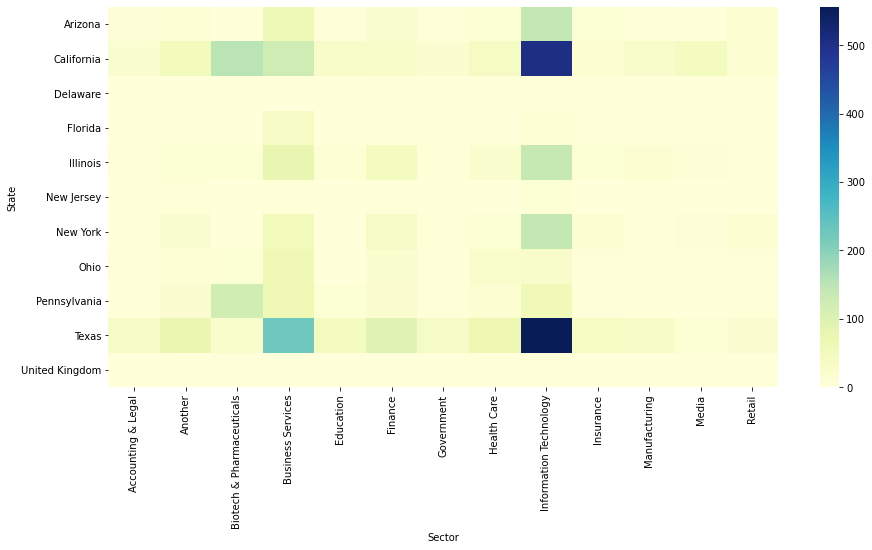

In [50]:
plt.figure(figsize=(15, 7))
sns.heatmap(ss,cmap="YlGnBu");

Như vậy, ta có nhận xét:
- Các công ty thuộc ngành ***Information technology*** là những công ty tuyển dụng vị trí liên quan đến data nhiều nhất. Những công ty này tập trung phần lớn ở ***Texas*** và ***California***. Những vùng khác tập trung với số lượng thấp hơn là ***Arizona, Illinois, New York***.
- Ngành cần nhiều nhân lực xếp sau ***Information technology*** là ***Business Services*** và các công ty chủ yếu tập trung ở ***Texas*** và ***California***.
- Các ngành khác cũng yêu cầu nhân sự về mảng data nhưng số lượng rất thấp.

Từ dữ liệu đã phân tích, ta trả lời được câu hỏi: hầu hết các công ty cần nhân lực về Data Science nói chung và về mảng Data nói riêng là những công ty về ***Information technology***, tiếp đó là ***Business Services, Biotech & Pharmaceuticals***,... Do đó nếu có thêm những kiến thức về những ngành này thì sẽ có lợi thế và có nhiều sự lựa chọn hơn khi tìm việc. Những vùng tập trung nhiều các công ty là ***Texas,California,Arizona, Illinois, New York***,...

### Câu hỏi 4: Vị trí Data Science mà các lĩnh vực mạnh có nhu cầu tuyển dụng cao? 

Việc xác định các vị trí Data Science có nhu cầu tuyển dụng cao sẽ giúp ta có cái nhìn về nhu cầu tuyển dụng lao động DS hiện nay cũng như các lĩnh vực mà DS có thể tham gia vào.

Đầu tiên, ta cần xác định lĩnh vực mạnh là gì? Ta sẽ xem lĩnh vực mạnh là các lĩnh vực mà có nhiều công ty thông báo tuyển dụng theo nhất (top 10 của cột `Sector`). Sau đó, dựa trên top 10 các lĩnh vực vừa xác định, ta sẽ đi tìm những vị trí Data Science mà các lĩnh vực này tuyển dụng nhiều.
* **Bước 1:** Xác định lĩnh vực mạnh từ cột `Sector`.
* **Bước 2:** Xử lý cột `Job Title`.
* **Bước 3:** Trả lời câu hỏi đặt ra " Vị trí Data Science mà các lĩnh vực mạnh có nhu cầu tuyển dụng cao? "

**Bước 1:** Xác định các lĩnh vực mạnh từ cột Sector

In [51]:
print('Number of sectors:',len(ds_df['Sector'].unique()))
ds_df['Sector'].unique()

Number of sectors: 26


array(['Travel & Tourism', 'Consumer Services', nan,
       'Information Technology', 'Business Services', 'Insurance',
       'Finance', 'Retail', 'Media', 'Restaurants, Bars & Food Services',
       'Agriculture & Forestry', 'Non-Profit', 'Education', 'Government',
       'Health Care', 'Oil, Gas, Energy & Utilities',
       'Accounting & Legal', 'Manufacturing', 'Real Estate',
       'Biotech & Pharmaceuticals', 'Arts, Entertainment & Recreation',
       'Aerospace & Defense', 'Construction, Repair & Maintenance',
       'Transportation & Logistics', 'Telecommunications',
       'Mining & Metals'], dtype=object)

Trong cột `Sector` có xuất hiện giá trị thiếu nhưng các bước phân tích phía dưới sẽ không xét đến giá trị này nên không cần thực hiện xóa hay thay thế dòng có giá trị `nan`.

In [52]:
top_10_sector = ds_df['Sector'].value_counts()[:10]
top_10_sector

Information Technology       1124
Business Services             679
Biotech & Pharmaceuticals     293
Finance                       270
Health Care                   197
Insurance                     109
Education                     101
Manufacturing                  87
Government                     82
Media                          75
Name: Sector, dtype: int64

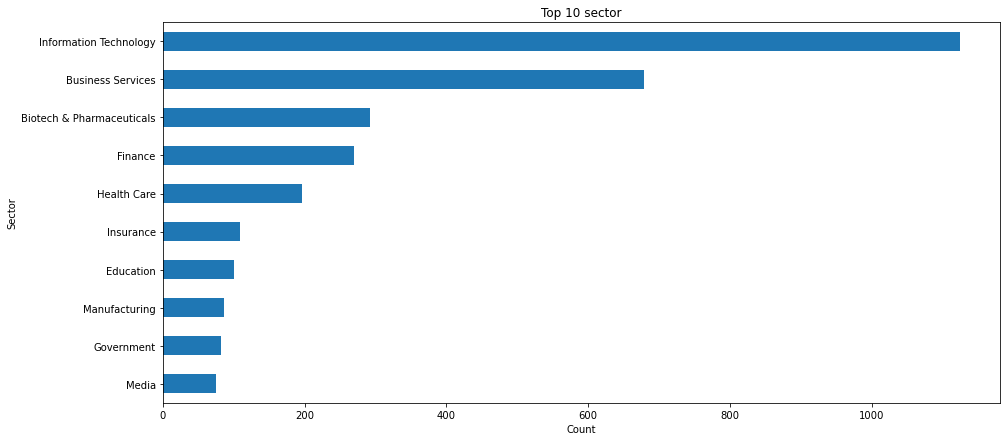

In [53]:
# Trực quan hóa top 10 sector
top_10_sector.sort_values().plot.barh(figsize=(15, 7))
plt.xlabel('Count')
plt.ylabel('Sector')
plt.title('Top 10 sector')
plt.show();

Qua biểu đồ trên, ta có thể đưa ra các nhận xét:
* `Information Technology` là lĩnh vực có nhu cầu tuyển dụng cao nhất và lớn hơn rất nhiều so với các lĩnh vực còn lại (gần gấp đôi lĩnh vực thứ 2 là `Business Services`)

* 26 lĩnh vực trong 3909 thông báo tuyển dụng đã cho thấy sự đa dạng về lĩnh vực trong Data Science. 

**Bước 2:** Xử lý cột `Job Title`

In [54]:
# Rút ra các dòng có Sector nằm trong top 10 sector
Job_Sector_top_10 = ds_df.loc[ds_df['Sector'].isin(top_10_sector.index.to_list())][['Job Title', 'Sector']]
print(*Job_Sector_top_10['Job Title'].value_counts().index, sep = '\n')

Data Scientist
Data Engineer
Data Analyst
Senior Data Scientist
Data Scientist 
Senior Data Analyst
Senior Data Engineer
Machine Learning Engineer
Senior Scientist
Scientist
Big Data Engineer
Business Intelligence Analyst
Lead Data Scientist
Principal Data Scientist
Federal 
Data Analyst 
Research Scientist
Data Engineer 
Quantum Principal Data Scientist (Industrial
Research Scientist 
Principal Scientist
Senior Data Scientist 
Statistician (Data Scientist) *12 month Roster* *Direct Hire*
AI
Quantitative Researcher
Junior Data Analyst
Data Modeler
Medical Laboratory Scientist 
Quantum Data Scientist (Industrial
Microsoft Analytics Consultant
COMPUTER SCIENTIST 
Microsoft Dynamics CRM Data Analyst
Associate Scientist
Scientist 
Sr Data Scientist
Quantitative Analyst
Senior Big Data Engineer
Business Data Analyst
COMPUTER SCIENTIST
Scientist I
Manager
Machine Learning Engineer 
Lead Data Engineer
Data Scientist II
JPSC
Director
Principal Data Engineer
Senior Machine Learning Engineer
Dat

Associate Research Scientist I
Automotive eCommerce Data Analyst
Data Analyst (Asset Management 
Air Compliance Engineer
Senior Data Engineer (Healthcare Domain experience required)
Geologist or Environmental Scientist 
Data Scientist (Engineering)
Senior Data Engineer (TS
(Data Risk Analyst: Data Modeler)
Laboratory Technician
Bioprocess Scientist
West University Place Data Science Tutor Jobs
Data Analyst Lead 
Data Analyst Alteryx Experience MUST
Data Analyst with Security Clearance
Future Opportunity: Data Engineer
Post Doctoral Scientist Year 1 3 Research C
CLINICAL LABORATORY SCIENTIST I
Data Scientist SR
Forensic Scientist IV 
Business Data Modeler
RD Scientist
Laboratory Scientist II
Sr Principal Scientist
Formulation development Sr Scientist
JC2001: Research Scientist: Protein chemistry
Sr Data Engineer Hadoop
Internship 
Payment Integrity Data Analyst
Graphics (GPU) Performance Modeling Engineer


Quan sát qua các giá trị xuất hiện, ta thấy cột `Job Title` cần xử lý các vấn đề sau:
* Do "Senior", "Junior", "Sr", "Jr" đều chỉ về kinh nghiệm của một người hơn là vị trí công việc. Vì thế, ta sẽ loại bỏ các cụm từ này trong cột `Job Title` để việc xác định và gom nhóm tên công việc chính xác hơn.
* Trong cột `Job Title` còn có giá trị số. Vì không thể xác định vị trí tuyển dụng thông qua các số này nên sẽ thực hiện loại bỏ chúng. 
* Ngoài ra, còn có một số dòng ghi các giá trị không thể hiện vị trí tuyển dụng như "Big", "Wi",... nhưng chỉ là thiểu số và ta cũng không thể tìm ra hết nên không thể xử lý tất cả dòng này.

In [55]:
# Xóa các từ không cần thiết 
val_replace = ["Senior ", "Junior ", "Sr ", "Jr "]
def replace_val(x):
    for val in val_replace:
        if val in x:
            x = x.replace(val, '')
    return x.strip()
Job_Sector_top_10['Job Title'] = Job_Sector_top_10['Job Title'].apply(lambda x: replace_val(x))

Xóa các dòng chứa số trong cột `Job Title`.

In [56]:
# Xóa các dòng số trong cột Job Title 
Job_Sector_top_10.drop(Job_Sector_top_10[Job_Sector_top_10['Job Title'].apply(
    lambda x: x.isnumeric())].index, inplace=True)

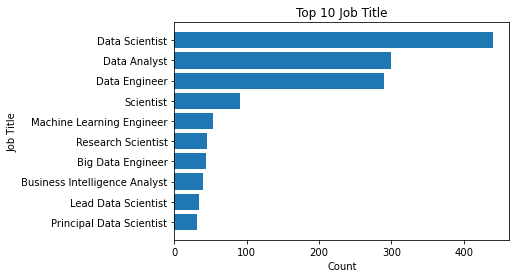

In [57]:
# Trực quan hóa top 10 job title 
jobTitle_top_10 = Job_Sector_top_10['Job Title'].value_counts()[:10]
jobTitle_top_10 = {k: v for k, v in sorted(jobTitle_top_10.items(), key = lambda x: x[1])}
plt.barh(list(jobTitle_top_10.keys()), list(jobTitle_top_10.values()))
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Job Title')
plt.show();

In [58]:
print("Numbers of unique job title:", len(Job_Sector_top_10['Job Title'].unique()))

Numbers of unique job title: 983


**Bước 3:** Trả lời câu hỏi và đưa ra nhận xét

Như vậy, ta có những đánh giá sau:
* Các vị trí như Data Scientist, Data Analyst, Data Engineer là những vị trí đang có nhu cầu tuyển dụng rất lớn. 
* Có rất nhiều lĩnh vực cần vị trí liên quan tới Data Science từ Information Technology đến các ngành liên quan tới kinh tế như Business Services hay ngay cả các lĩnh vực như Health Care, Education, Government cũng đang có nhu cầu tuyển dụng.
* Có gần 1000 vị trí khác nhau trong 3334 thông báo tuyển dụng từ các công ty cho thấy vị trí mà Data Science có thể đảm nhiệm rất đa dạng.

### Câu hỏi 5: Mức lương có liên quan tới size của công ty không?

Ta cần tiến hành một số thao tác xử lý trước khi trực quan hóa và tìm câu trả lời cho câu hỏi này.

- **Bước 1:** Phân loại kích thước công ty theo lớn, vừa và nhỏ.

- **Bước 2:** Xác định `mean`, `min`, `max`, `median` của `SalaryMin` và `SalaryMax` theo nhóm công ty. 

- **Bước 3:** Trực quan hóa dữ liệu và đưa ra kết luận.

Việc phân tích sự tương quan giữa mức lương với size của công ty sẽ giúp ta có cái nhìn về việc chi trả lương thưởng tại các công ty lớn, vừa và nhỏ. Qua đó, ta biết được liệu công ty càng lớn thì sự đãi ngộ với nhân viên (qua mức lương) sẽ càng cao hay không.

**Bước 1:** Phân loại kích thước công ty theo lớn, vừa và nhỏ.


In [59]:
ds_df['Size'].value_counts()

10000.0    993
125.0      563
3000.0     553
25.0       550
350.0      418
750.0      307
7500.0     219
Name: Size, dtype: int64

Size của công ty không có quá nhiều giá trị khác nhau gây khó quan sát. Ta có thể dễ dàng phân loại các công ty này thành 3 nhóm: 1. Lớn (= 10000), 2. Vừa (1000<= size <10000), 3. Nhỏ (<1000).

In [60]:
df = ds_df[["Size", "SalaryMin", "SalaryMax"]].copy()
df.loc[df.Size < 1000, 'Size'] = 3
df.loc[(df.Size >= 1000) & (df.Size < 10000),'Size'] = 2
df.loc[df.Size == 10000, 'Size'] = 1


**Bước 2:** Xác định `count`, `mean`, `min`, `max`, `median` của `SalaryMin` và `SalaryMax` theo nhóm công ty. 


In [61]:
sdf = df.groupby(by = 'Size').agg(['count','min','max','mean', 'median']).round(2)
sdf

SalaryMin                        SalaryMax                        
         count min  max   mean median     count min  max    mean median
Size                                                                   
1.0        993  12  200  84.80     83       993  27  254  138.75    143
2.0        772  12  200  80.56     76       772  27  254  130.99    124
3.0       1838  10  200  81.33     76      1838  26  254  132.73    129

Ta có thể rút ra nhận xét như sau: 

* Min Salary dao động từ 10k - 200k USD, Max Salary dao động từ 26k - 254k USD.

* Mức lương giữa các công ty lớn, vừa và nhỏ không có sự chênh lệch quá nhiều.

* Công ty nhỏ chiếm hơn phân nửa nhu cầu tuyển dụng.

Trực quan hóa size các công ty và min, max, mean mức lương.

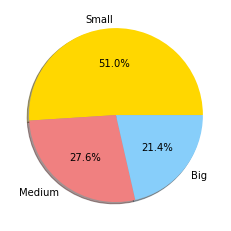

In [62]:
fig1, ax1 = plt.subplots()
colors = ['gold','lightcoral', 'lightskyblue']
ax1.pie(df['Size'].value_counts().to_list(),
        labels = ['Small', 'Medium', 'Big'], autopct = '%1.1f%%', colors = colors, shadow = True)
plt.show()

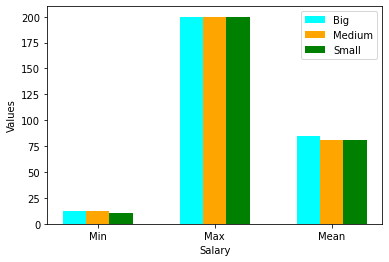

In [63]:
x = np.arange(3)
y1 = [sdf['SalaryMin']['min'][1],sdf['SalaryMin']['max'][1],sdf['SalaryMin']['mean'][1]]
y2 = [sdf['SalaryMin']['min'][2],sdf['SalaryMin']['max'][2],sdf['SalaryMin']['mean'][2]]
y3 = [sdf['SalaryMin']['min'][3],sdf['SalaryMin']['max'][3],sdf['SalaryMin']['mean'][3]]
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Min', 'Max', 'Mean'])
plt.xlabel("Salary")
plt.ylabel("Values")
plt.legend(["Big", "Medium", "Small"])
plt.show()

Ta có thể rút ra các nhận xét sau:
* Phần lớn công ty đang có nhu cầu tuyển dụng là công ty nhỏ.

* Mức lương các công ty lớn chi trả có phần nhỉnh hơn so với công ty tầm trung hay công ty nhỏ.

* Mức lương thấp nhất nằm vào khoảng 10k-12k (USD) và mức lương cao nhất nằm vào khoảng 254k USD.

* Đối với Salary Min và Salary Max, các công ty có thể đưa ra mức giá chênh lệch nhau (trong mỗi cột) đến hơn 100k USD.

Ta chưa thể rút ra kết luận công ty càng lớn sẽ đưa ra mức lương càng cao vì số liệu phản ánh không quá rõ ràng và sự chênh lệch chưa đủ lớn. Tuy nhiên, đa số công ty đều đưa ra mức giá tương đương với thị trường để có thể thu hút người lao động.

## Tổng kết

### Võ Thành Nam

1. Một số khó khăn gặp phải: 
    - Sử dụng github để làm việc nhóm (vì các đồ án trước đây chủ yếu làm cá nhân nên không dùng github).
    - Gặp một số khó khăn khi chia việc vì tốc độ làm việc của mỗi người trong nhóm khác nhau.
    - Phải tìm tòi một vài thư viện mới mà trên lớp chưa được dạy.
2. Các bài học đã học được: 
    - Sử dụng thành thạo github (ở mức cơ bản).
    - Tương đối thuần thục các thao tác tiền xử lí, khám phá dữ liệu, trả lời các câu hỏi từ dữ liệu.
    - Nắm được những thư viện cơ bản phục vụ cho các thao tác với dữ liệu.

### Phạm Lưu Mỹ Phúc 

1. Một số khó khăn gặp phải: 
    - Sử dụng github để làm việc nhóm vì chưa quen sử dụng github.
    - Không dành nhiều thời gian cho đồ án vì là thời gian thi cuối kì.
    - Tìm câu hỏi tốt để đưa ra câu trả lời từ dữ liệu.
2. Các bài học đã học được: 
    - Biết dùng github ở mức cơ bản.
    - Tương đối thuần thục các thao tác tiền xử lí, khám phá dữ liệu, trả lời các câu hỏi từ dữ liệu.
    - Nắm được những thư viện cơ bản phục vụ cho các thao tác với dữ liệu.
    - Học hỏi thêm thao tác tiền xử lý, khám phá dữ liệu và đặt câu hỏi từ các tài liệu tham khảo.

### Với cả nhóm

Nếu có thêm thời gian, nhóm sẽ:
- Cố gắng khai thác thêm những thuộc tính trong dataset mà chưa được sử dụng trong các câu hỏi đã đề cập ở trên.
- Khai thác các tập ngôn ngữ phổ biến thường được yêu cầu.
- Có thể cố gắng xây dựng một mô hình Machine Learning đơn giản để gợi ý công ty cho những người cần tìm kiếm công việc dựa trên nhu cầu của họ.

## Tài liệu tham khảo

1. [Một số thao tác tiền xử lí của các thành viên trên Kaggle](https://www.kaggle.com/andrewmvd/data-scientist-jobs/code).
2. [Bảng chuyển đổi mã vùng USA](https://www.scouting.org/resources/los/states/).
3. Slide và video bài giảng của giảng viên.
4. Tham khảo một số công cụ/ngôn ngữ phổ biến: [Link 1](https://medium.com/javarevisited/best-11-data-science-programming-languages-in-2020-122a7ea2bb63), [Link 2](https://www.analyticsinsight.net/10-best-data-science-programming-languages-for-data-aspirants-in-2021/)
